In [ ]:
# Lab | Customer Analysis

#In today's lesson we talked about linear regression and how multicollinearity can impact the model. In this lab, we will test your knowledge on those things using the `marketing_customer_analysis.csv` file. You have been using the same data in the previous labs. You can continue using the same jupyter file. The file can be found in the `Data` folder.

### Get the data 

#Use the jupyter file from the previous lab on Customer Analysis

### Complete the following task 

#- Check the data types of the columns. Get the numeric data into dataframe called `numerical` and categorical columns in a dataframe called `categoricals`. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)

#- For the numerical variables:
#- Use Matplotlib to construct histograms to check the normality of the numerical variables visually
#- Check the multicollinearity between the features. Please note that we will use the column `total_claim_amount` later as the target variable. 
  
#- Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

#- Split data into Y (`total_claim_amount`) and X (numerical, independent variables)

#- Conduct Linear Regressions
#Using Statsmodels
#Using sklearn
#Interpret results

In [1]:
import numpy as np
from scipy.stats import norm
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

customer_Analysis = pd.read_csv('marketing_customer_analysis.csv') 
customer_Analysis

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [2]:
customer_Analysis.columns = customer_Analysis.columns.str.lower()
customer_Analysis.columns = customer_Analysis.columns.str.replace(' ', '_')
customer_Analysis.head()

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [3]:
customer_Analysis = customer_Analysis.drop(['unnamed:_0'], axis=1)
customer_Analysis.tail()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A
10909,IV32877,NaN,6857.519928,NaN,Basic,Bachelor,1/8/11,Unemployed,M,0,...,0.0,3,Personal Auto,Personal L1,Offer4,Web,1021.719397,SUV,Medsize,NaN


In [4]:
customer_Analysis = customer_Analysis.drop_duplicates()
customer_Analysis.shape

(10873, 25)

In [5]:
customer_Analysis=customer_Analysis.dropna()
customer_Analysis.shape

(4543, 25)

In [6]:
customer_Analysis.dtypes

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim          float64
months_since_policy_inception      int64
number_of_open_complaints        float64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
vehicle_type    

In [7]:
numerical = customer_Analysis._get_numeric_data()
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
10,5154.764074,82730,127,13.0,31,0.0,1,442.521087
13,5454.587929,66334,69,25.0,25,0.0,4,331.200000
16,5326.677654,76717,66,26.0,10,0.0,6,300.528579
...,...,...,...,...,...,...,...,...
10902,3579.023825,28304,91,10.0,30,2.0,1,655.200000
10903,2771.663013,59855,74,30.0,82,4.0,1,355.200000
10904,19228.463620,0,187,14.0,32,0.0,2,897.600000
10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929


In [8]:
categorical = customer_Analysis.select_dtypes('object')
categorical

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
10,HG93801,Arizona,No,Extended,High School or Below,1/2/11,Employed,M,Urban,Married,Corporate Auto,Corporate L3,Offer2,Branch,SUV,Large,A
13,KR82385,California,No,Basic,Master,1/26/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Two-Door Car,Medsize,A
16,FH51383,California,No,Basic,High School or Below,2/7/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer4,Call Center,Two-Door Car,Large,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10902,PP30874,California,No,Extended,High School or Below,1/24/11,Employed,F,Suburban,Married,Personal Auto,Personal L2,Offer2,Agent,Four-Door Car,Medsize,A
10903,SU71163,Arizona,No,Basic,College,1/7/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer2,Branch,Two-Door Car,Medsize,A
10904,QI63521,Nevada,No,Basic,High School or Below,2/24/11,Unemployed,M,Suburban,Single,Personal Auto,Personal L2,Offer1,Branch,Luxury SUV,Medsize,A
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A


In [9]:
numerical.dtypes

customer_lifetime_value          float64
income                             int64
monthly_premium_auto               int64
months_since_last_claim          float64
months_since_policy_inception      int64
number_of_open_complaints        float64
number_of_policies                 int64
total_claim_amount               float64
dtype: object

In [10]:
categorical.dtypes

customer             object
state                object
response             object
coverage             object
education            object
effective_to_date    object
employmentstatus     object
gender               object
location_code        object
marital_status       object
policy_type          object
policy               object
renew_offer_type     object
sales_channel        object
vehicle_class        object
vehicle_size         object
vehicle_type         object
dtype: object

In [11]:
numeric_columns = customer_Analysis.select_dtypes(include='number').columns.tolist()
numerical_df = customer_Analysis[numeric_columns]

categorical_columns = customer_Analysis.select_dtypes(include='object').columns.tolist()
categorical_df = customer_Analysis[categorical_columns]

In [12]:
numerical_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
10,5154.764074,82730,127,13.0,31,0.0,1,442.521087
13,5454.587929,66334,69,25.0,25,0.0,4,331.200000
16,5326.677654,76717,66,26.0,10,0.0,6,300.528579


In [13]:
categorical_df

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
10,HG93801,Arizona,No,Extended,High School or Below,1/2/11,Employed,M,Urban,Married,Corporate Auto,Corporate L3,Offer2,Branch,SUV,Large,A
13,KR82385,California,No,Basic,Master,1/26/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Two-Door Car,Medsize,A
16,FH51383,California,No,Basic,High School or Below,2/7/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer4,Call Center,Two-Door Car,Large,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10902,PP30874,California,No,Extended,High School or Below,1/24/11,Employed,F,Suburban,Married,Personal Auto,Personal L2,Offer2,Agent,Four-Door Car,Medsize,A
10903,SU71163,Arizona,No,Basic,College,1/7/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer2,Branch,Two-Door Car,Medsize,A
10904,QI63521,Nevada,No,Basic,High School or Below,2/24/11,Unemployed,M,Suburban,Single,Personal Auto,Personal L2,Offer1,Branch,Luxury SUV,Medsize,A
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A


C:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='customer_lifetime_value', ylabel='Count'>

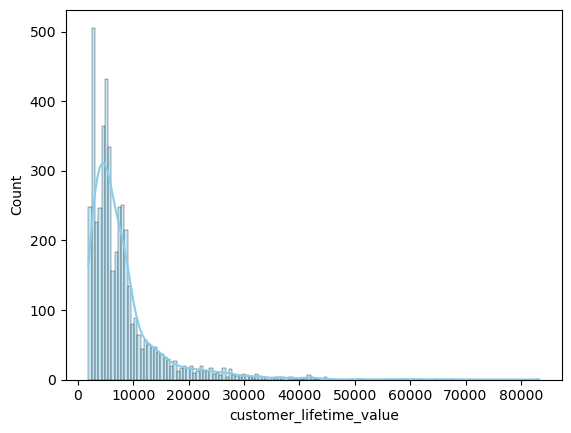

In [14]:
sns.histplot(numerical_df['customer_lifetime_value'], kde=True, color='skyblue')

C:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='income', ylabel='Count'>

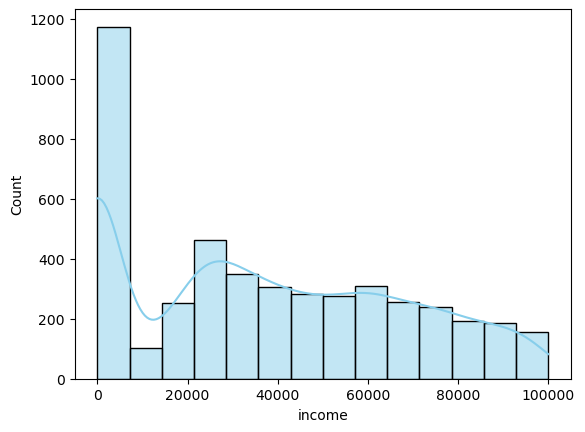

In [15]:
sns.histplot(numerical_df['income'], kde=True, color='skyblue')

C:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='monthly_premium_auto', ylabel='Count'>

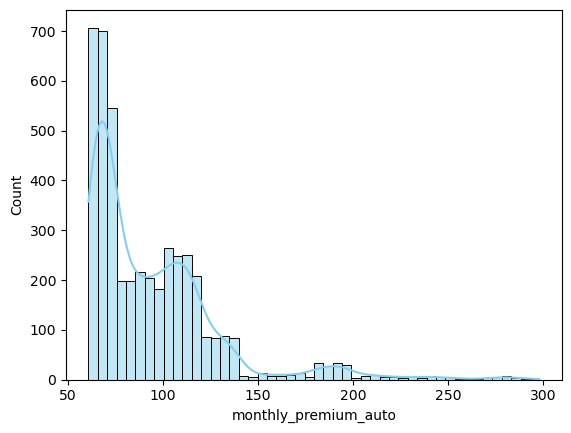

In [16]:
sns.histplot(numerical_df['monthly_premium_auto'], kde=True, color='skyblue')

C:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='months_since_last_claim', ylabel='Count'>

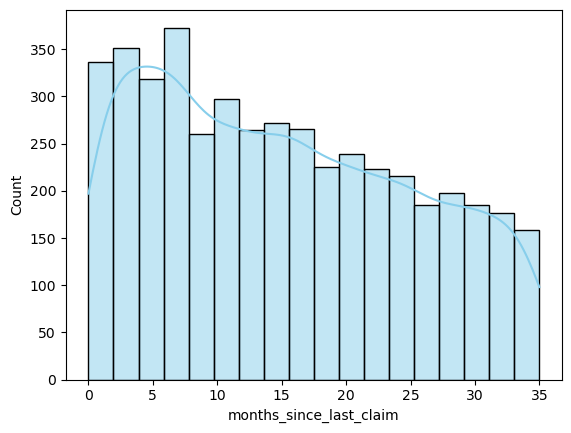

In [17]:
sns.histplot(numerical_df['months_since_last_claim'], kde=True, color='skyblue')

C:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='months_since_policy_inception', ylabel='Count'>

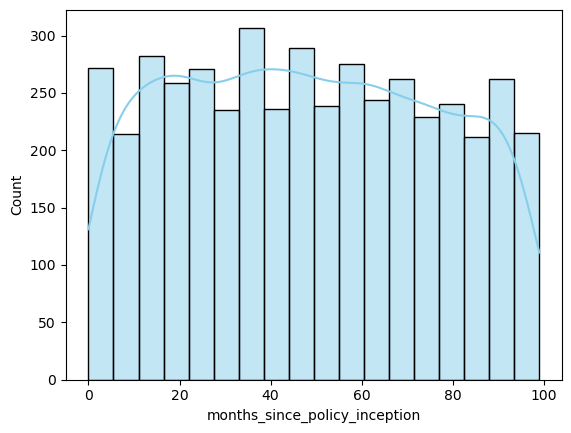

In [18]:
sns.histplot(numerical_df['months_since_policy_inception'], kde=True, color='skyblue')

C:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='number_of_open_complaints', ylabel='Count'>

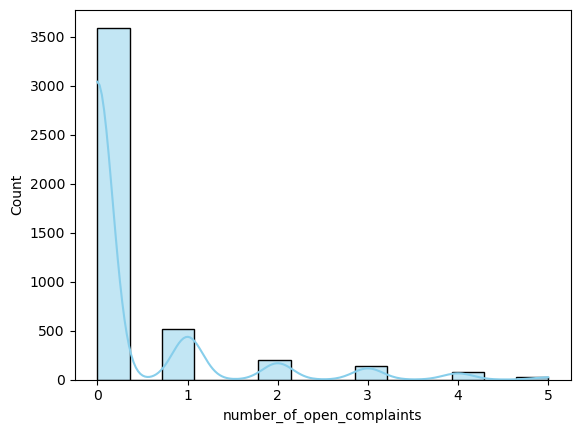

In [19]:
sns.histplot(numerical_df['number_of_open_complaints'], kde=True, color='skyblue')

C:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='number_of_policies', ylabel='Count'>

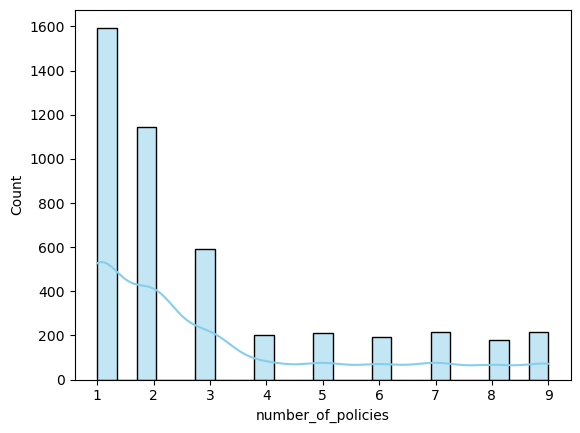

In [20]:
sns.histplot(numerical_df['number_of_policies'], kde=True, color='skyblue')

C:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='total_claim_amount', ylabel='Count'>

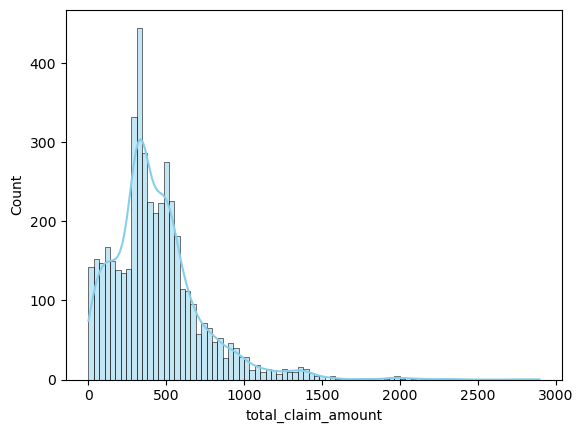

In [21]:
sns.histplot(numerical_df['total_claim_amount'], kde=True, color='skyblue')

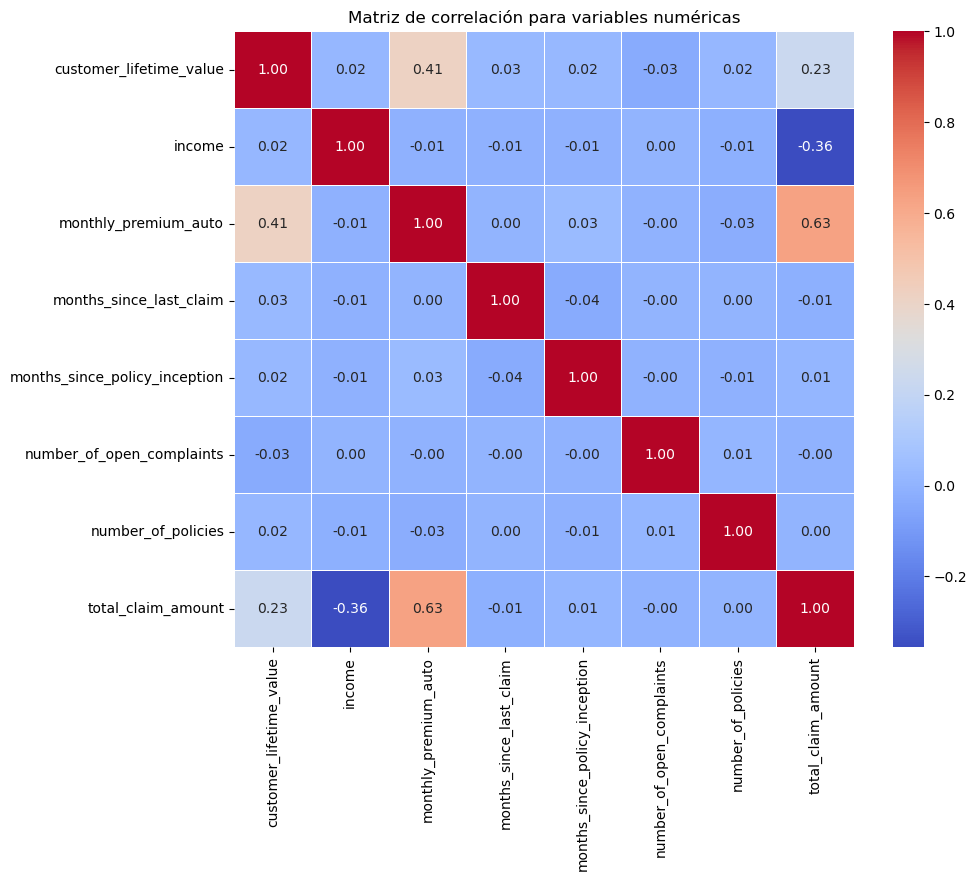

In [22]:
#- Elimine una de las dos características que muestren una alta correlación entre ellas (mayor de 0,9). 
#-Escriba el código tanto para la matriz de correlación como para el mapa de calor seaborn. 
#-Si no hay ningún par de características que tengan una alta correlación, entonces no elimine ninguna característica.

correlation_matrix = numerical_df.corr() # Calcular la matriz de correlación

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de correlación para variables numéricas')
plt.show()

In [23]:
numerical_df.corr()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.015914,0.413739,0.029199,0.022465,-0.034924,0.015397,0.228579
income,0.015914,1.000000,-0.007594,-0.010556,-0.007987,0.001149,-0.013199,-0.355311
monthly_premium_auto,0.413739,-0.007594,1.000000,0.000890,0.033422,-0.002469,-0.025578,0.630894
months_since_last_claim,0.029199,-0.010556,0.000890,1.000000,-0.036879,-0.000364,0.001089,-0.011449
months_since_policy_inception,0.022465,-0.007987,0.033422,-0.036879,1.000000,-0.001965,-0.009029,0.012610
number_of_open_complaints,-0.034924,0.001149,-0.002469,-0.000364,-0.001965,1.000000,0.014388,-0.003433
number_of_policies,0.015397,-0.013199,-0.025578,0.001089,-0.009029,0.014388,1.000000,0.002864
total_claim_amount,0.228579,-0.355311,0.630894,-0.011449,0.012610,-0.003433,0.002864,1.000000


In [ ]:
# si entendi bien no tengo ninguna que tenga una correlacion de mas de 0.9, por lo tanto no elimino ninguna, las mas correlacionadas son monthly_premium_auto con total_claim_amount

In [ ]:
#- Dividir los datos en Y (`total_claim_amount`) y X (variables numéricas, independientes)
#- Realice regresiones lineales
#Usando Statsmodels
#Usando sklearn
#Interpretar los resultados

In [24]:
Y = numerical_df['total_claim_amount']
X = numerical_df.drop(['total_claim_amount'], axis=1)

In [25]:
Y.info()

<class 'pandas.core.series.Series'>
Index: 4543 entries, 2 to 10908
Series name: total_claim_amount
Non-Null Count  Dtype  
--------------  -----  
4543 non-null   float64
dtypes: float64(1)
memory usage: 71.0 KB


In [26]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4543 entries, 2 to 10908
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        4543 non-null   float64
 1   income                         4543 non-null   int64  
 2   monthly_premium_auto           4543 non-null   int64  
 3   months_since_last_claim        4543 non-null   float64
 4   months_since_policy_inception  4543 non-null   int64  
 5   number_of_open_complaints      4543 non-null   float64
 6   number_of_policies             4543 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 283.9 KB


In [27]:
X = sm.add_constant(X)
model = sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     708.3
Date:                Thu, 25 Apr 2024   Prob (F-statistic):               0.00
Time:                        19:36:47   Log-Likelihood:                -30604.
No. Observations:                4543   AIC:                         6.122e+04
Df Residuals:                    4535   BIC:                         6.128e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [ ]:
# en este modelo nos interesa ver siempre el r-squared que tiene que estar 0.5 para arriba (puede que sea mas bajo si las varibales y dependan de x)
# mirar siemore el coef y el P>/t/ si es mas de 0.1 es no significativa, menos es significativo

# Analizando esto con los datos recopilados en clase vemos que el r-squared esta apenas por arriba de 0.5 asique estamos bien.
# En cuanto al coef vemos que muchas variables dan negativo excepto monthly_premium_auto y number_of_policies que son las mas correlacionadas con total_claim_amount aunque no tanto ya que no llegan al 0.9
# En referencia al P>/t vemos que muchas variables no son significativas ya que su valor es mayor a 0.1, (months_since_last_claim, months_since_policy_inception, number_of_open_complaints, number_of_policies) lo que hace que no afecten tanto.

In [28]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

Y = numerical_df['total_claim_amount']
X = numerical_df.drop(['total_claim_amount'], axis=1)
lm = linear_model.LinearRegression()
model = lm.fit(X,Y)
print("R2 value is = ",round(lm.score(X,Y),2))

R2 value is =  0.52


In [29]:
predictions = lm.predict(X)
print("R2 value is = ",round(r2_score(Y, predictions),2))
print("The intercept of the model is = ",lm.intercept_)
print("The coefficients of the model are = ",lm.coef_)
predictions = lm.predict(X)
mse = mean_squared_error(Y, predictions)
print("The mse of the model is = ",mse)

R2 value is =  0.52
The intercept of the model is =  76.09376845833862
The coefficients of the model are =  [-1.31580729e-03 -3.41261852e-03  5.39594388e+00 -4.42777105e-01
 -1.19199414e-01 -9.02423912e-01  1.86291594e+00]
The mse of the model is =  41571.61137445364
